Fantasy Football 2024-25 season projections.    
By Ben Ilacqua

In [1216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [1217]:
df = pd.read_excel("C:\\Users\\benil\\OneDrive\\Documents\\Player Stats for Fantasy.xlsx")

In [1218]:
df.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,PTD,Int,...,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt
0,Josh Allen,BUF,QB,27,17,385,579,4306,29,18,...,524,4.72,15,0,0,0,NaN,0,4,420.6
1,Jalen Hurts*,PHI,QB,25,17,352,538,3858,23,15,...,605,3.85,15,0,0,0,NaN,0,5,382.8
2,Dak Prescott*,DAL,QB,30,17,410,590,4516,36,9,...,242,4.40,2,0,0,0,NaN,0,2,359.8
3,Lamar Jackson*+,BAL,QB,26,16,307,457,3678,24,7,...,821,5.55,5,0,0,0,NaN,0,6,350.2
4,Christian McCaffrey*+,SFO,RB,27,16,0,0,0,0,0,...,1459,5.36,14,83,67,564,8.42,7,2,399.3


In [1219]:
rb_df = df[df['FantPos'] == 'RB']
qb_df = df[df['FantPos'] == 'QB']
wr_df = df[df['FantPos'] == 'WR']
te_df = df[df['FantPos'] == 'TE']
rb_df.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,PTD,Int,...,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt
4,Christian McCaffrey*+,SFO,RB,27,16,0,0,0,0,0,...,1459,5.36,14,83,67,564,8.42,7,2,399.3
17,Raheem Mostert*,MIA,RB,31,15,0,0,0,0,0,...,1012,4.84,18,32,25,175,7.00,3,1,274.7
23,Travis Etienne,JAX,RB,24,17,0,0,0,0,0,...,1008,3.78,11,73,58,476,8.21,1,0,288.4
24,Kyren Williams*,LAR,RB,23,12,0,0,0,0,0,...,1144,5.02,12,48,32,206,6.44,3,2,263.0
25,Derrick Henry*,TEN,RB,29,17,2,3,14,2,0,...,1167,4.17,12,36,28,214,7.64,0,0,252.7


In [1220]:
rushing_variables = ['RUAtt', 'RUYds', 'Y/A', 'RUTD']
receiving_variables = ['Tgt', 'REYds', 'Rec', 'RETD','Y/R']
passing_variables = ['Cmp','Att','PTD', 'Int', 'Yds']
#I used this code to drop irrelevant stats, for example QBS typically arnt catching the ball, so I dropped receiving_variables from qb_df.

In [1221]:
rb_df = rb_df.drop(columns=passing_variables)
wr_df = wr_df.drop(columns=passing_variables)
te_df = te_df.drop(columns=passing_variables+rushing_variables)
qb_df = qb_df.drop(columns=receiving_variables)
qb_df.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,PTD,Int,RUAtt,RUYds,Y/A,RUTD,FL,DKPt
0,Josh Allen,BUF,QB,27,17,385,579,4306,29,18,111,524,4.72,15,4,420.6
1,Jalen Hurts*,PHI,QB,25,17,352,538,3858,23,15,157,605,3.85,15,5,382.8
2,Dak Prescott*,DAL,QB,30,17,410,590,4516,36,9,55,242,4.40,2,2,359.8
3,Lamar Jackson*+,BAL,QB,26,16,307,457,3678,24,7,148,821,5.55,5,6,350.2
5,Jordan Love,GNB,QB,25,17,372,579,4159,32,11,50,247,4.94,4,3,339.1


In [1222]:
#Here I want a way to calculate usage for each player, this is basically the stat touches/game
rb_df['Usage'] = (rb_df['RUAtt'] + rb_df['Tgt'])/ rb_df['G']
wr_df['Usage'] = (wr_df['RUAtt'] + wr_df['Tgt'])/ wr_df['G']
te_df['Usage'] =  te_df['Tgt']/te_df['G']
qb_df['Usage'] = qb_df['RUAtt']/qb_df['G']
rb_df.head()

,Player,Tm,FantPos,Age,G,RUAtt,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage
4,Christian McCaffrey*+,SFO,RB,27,16,272,1459,5.36,14,83,67,564,8.42,7,2,399.3,22.187500
17,Raheem Mostert*,MIA,RB,31,15,209,1012,4.84,18,32,25,175,7.00,3,1,274.7,16.066667
23,Travis Etienne,JAX,RB,24,17,267,1008,3.78,11,73,58,476,8.21,1,0,288.4,20.000000
24,Kyren Williams*,LAR,RB,23,12,228,1144,5.02,12,48,32,206,6.44,3,2,263.0,23.000000
25,Derrick Henry*,TEN,RB,29,17,280,1167,4.17,12,36,28,214,7.64,0,0,252.7,18.588235


In [1223]:
te_df.head()

,Player,Tm,FantPos,Age,G,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage
64,Sam LaPorta*,DET,TE,22,17,120,86,889,10.34,10,0,242.3,7.058824
80,George Kittle*+,SFO,TE,30,16,90,65,1020,15.69,6,0,206.2,5.625000
93,Travis Kelce*,KAN,TE,34,15,121,93,984,10.58,5,1,223.4,8.066667
96,T.J. Hockenson,MIN,TE,26,15,127,95,960,10.11,5,1,223.0,8.466667
99,David Njoku*,CLE,TE,27,16,123,81,882,10.89,6,2,206.2,7.687500


In [1224]:
wr_df.head()

,Player,Tm,FantPos,Age,G,RUAtt,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage
12,CeeDee Lamb*+,DAL,WR,24,17,14,113,8.07,2,181,135,1749,12.96,12,2,411.2,11.470588
14,Tyreek Hill*+,MIA,WR,29,16,6,15,2.50,0,171,119,1799,15.12,13,1,380.4,11.062500
28,Amon-Ra St. Brown*+,DET,WR,24,16,4,24,6.00,0,164,119,1515,12.73,10,1,334.9,10.500000
29,Mike Evans*,TAM,WR,30,17,0,0,NaN,0,136,79,1255,15.89,13,0,285.5,8.000000
33,Puka Nacua*,LAR,WR,22,17,12,89,7.42,0,160,105,1486,14.15,6,0,301.5,10.117647


Visualization is always a key to good code!!

<Axes: xlabel='Usage', ylabel='DKPt'>

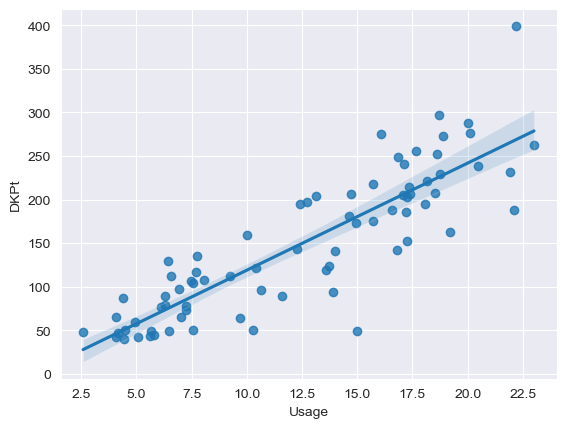

In [1225]:
sns.regplot(x='Usage', y='DKPt', data=rb_df)

<Axes: xlabel='Usage', ylabel='DKPt'>

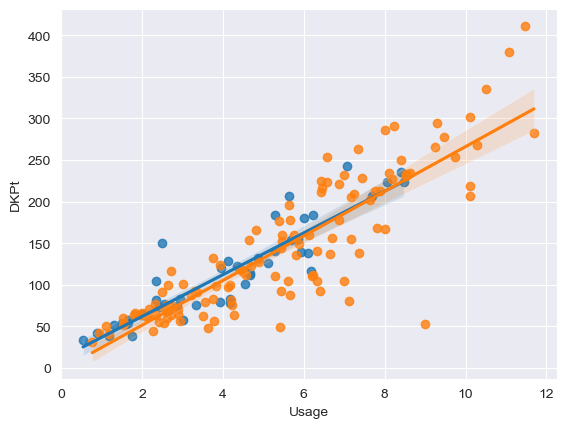

In [1226]:
sns.regplot(x='Usage', y='DKPt', data=te_df)
sns.regplot(x='Usage', y='DKPt', data=wr_df)

In terms of usage TE and WR correlate pretty well, with usage and points being similar between the two positions. Running backs usage rates are typically higher because they catch the ball and run the ball, that being said typically you see double the usage for the same points in RBs compared to WR/TE. You could craft up a drafting strategy simply based off the usage rates alone, but let's go deeper. 

In [1227]:
rb_df['TD/Usage'] = (rb_df['RUTD'] + rb_df['RETD'])/ (rb_df['RUAtt'] + rb_df['Tgt'])
rb_df.head()

,Player,Tm,FantPos,Age,G,RUAtt,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage,TD/Usage
4,Christian McCaffrey*+,SFO,RB,27,16,272,1459,5.36,14,83,67,564,8.42,7,2,399.3,22.187500,0.059155
17,Raheem Mostert*,MIA,RB,31,15,209,1012,4.84,18,32,25,175,7.00,3,1,274.7,16.066667,0.087137
23,Travis Etienne,JAX,RB,24,17,267,1008,3.78,11,73,58,476,8.21,1,0,288.4,20.000000,0.035294
24,Kyren Williams*,LAR,RB,23,12,228,1144,5.02,12,48,32,206,6.44,3,2,263.0,23.000000,0.054348
25,Derrick Henry*,TEN,RB,29,17,280,1167,4.17,12,36,28,214,7.64,0,0,252.7,18.588235,0.037975


In [1228]:
wr_df['TD/Usage'] = (wr_df['RUTD'] + wr_df['RETD'])/ (wr_df['RUAtt'] + wr_df['Tgt'])
wr_df.head()

,Player,Tm,FantPos,Age,G,RUAtt,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage,TD/Usage
12,CeeDee Lamb*+,DAL,WR,24,17,14,113,8.07,2,181,135,1749,12.96,12,2,411.2,11.470588,0.071795
14,Tyreek Hill*+,MIA,WR,29,16,6,15,2.50,0,171,119,1799,15.12,13,1,380.4,11.062500,0.073446
28,Amon-Ra St. Brown*+,DET,WR,24,16,4,24,6.00,0,164,119,1515,12.73,10,1,334.9,10.500000,0.059524
29,Mike Evans*,TAM,WR,30,17,0,0,NaN,0,136,79,1255,15.89,13,0,285.5,8.000000,0.095588
33,Puka Nacua*,LAR,WR,22,17,12,89,7.42,0,160,105,1486,14.15,6,0,301.5,10.117647,0.034884


In [1229]:
te_df['TD/Usage'] = te_df['RETD']/te_df['Tgt']
te_df.head()

,Player,Tm,FantPos,Age,G,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage,TD/Usage
64,Sam LaPorta*,DET,TE,22,17,120,86,889,10.34,10,0,242.3,7.058824,0.083333
80,George Kittle*+,SFO,TE,30,16,90,65,1020,15.69,6,0,206.2,5.625000,0.066667
93,Travis Kelce*,KAN,TE,34,15,121,93,984,10.58,5,1,223.4,8.066667,0.041322
96,T.J. Hockenson,MIN,TE,26,15,127,95,960,10.11,5,1,223.0,8.466667,0.039370
99,David Njoku*,CLE,TE,27,16,123,81,882,10.89,6,2,206.2,7.687500,0.048780


<Axes: xlabel='TD/Usage', ylabel='DKPt'>

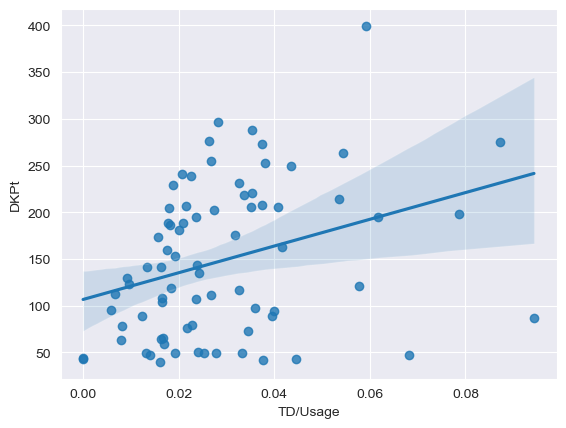

In [1230]:
sns.regplot(x='TD/Usage', y='DKPt', data=rb_df)

<Axes: xlabel='TD/Usage', ylabel='DKPt'>

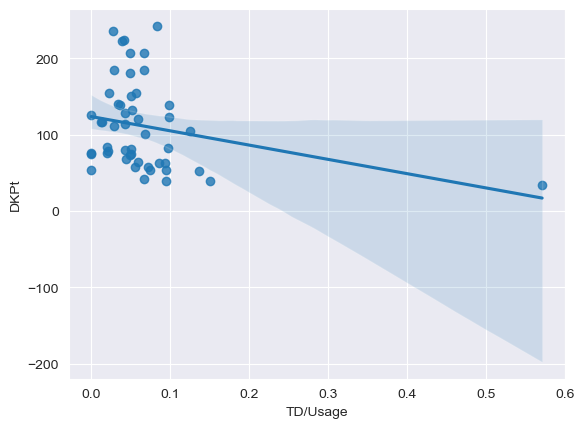

In [1231]:
sns.regplot(x='TD/Usage', y='DKPt', data=te_df)

<Axes: xlabel='TD/Usage', ylabel='DKPt'>

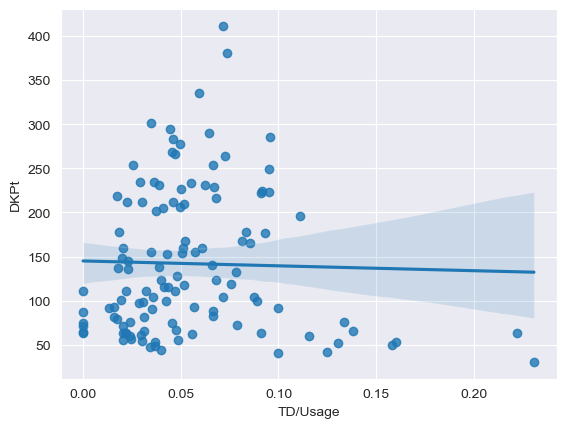

In [1232]:
sns.regplot(x='TD/Usage', y='DKPt', data=wr_df)

Not much correlation with the WR and TE groups, but the RB showed some correlation. Next I am going to build a model and create a test set based on how I think the usage will change for players in the upcoming season.

In [1233]:
XQB = qb_df
XRB = rb_df
XWR = wr_df
XTE = te_df

XQB.head()

,Player,Tm,FantPos,Age,G,Cmp,Att,Yds,PTD,Int,RUAtt,RUYds,Y/A,RUTD,FL,DKPt,Usage
0,Josh Allen,BUF,QB,27,17,385,579,4306,29,18,111,524,4.72,15,4,420.6,6.529412
1,Jalen Hurts*,PHI,QB,25,17,352,538,3858,23,15,157,605,3.85,15,5,382.8,9.235294
2,Dak Prescott*,DAL,QB,30,17,410,590,4516,36,9,55,242,4.40,2,2,359.8,3.235294
3,Lamar Jackson*+,BAL,QB,26,16,307,457,3678,24,7,148,821,5.55,5,6,350.2,9.250000
5,Jordan Love,GNB,QB,25,17,372,579,4159,32,11,50,247,4.94,4,3,339.1,2.941176


In [1234]:
XQB.drop(columns=['DKPt', 'FL', 'G', 'FantPos', 'Tm', 'Player'], axis=1, inplace=True)
XRB.drop(columns=['DKPt', 'Player', 'Tm', 'G', 'FantPos', 'FL' ], axis=1, inplace=True)
XWR.drop(columns=['DKPt', 'FL', 'G', 'FantPos', 'Tm', 'Player'], axis=1, inplace=True)
XTE.drop(columns= ['DKPt', 'FL', 'G', 'FantPos', 'Tm', 'Player' ], axis=1, inplace=True)
XQB.head()

,Age,Cmp,Att,Yds,PTD,Int,RUAtt,RUYds,Y/A,RUTD,Usage
0,27,385,579,4306,29,18,111,524,4.72,15,6.529412
1,25,352,538,3858,23,15,157,605,3.85,15,9.235294
2,30,410,590,4516,36,9,55,242,4.40,2,3.235294
3,26,307,457,3678,24,7,148,821,5.55,5,9.250000
5,25,372,579,4159,32,11,50,247,4.94,4,2.941176


In [1235]:
x_trainQBP = XQB.drop(columns = ['Yds', 'PTD', 'RUAtt', 'RUTD', 'RUYds', 'Usage', 'Y/A'])
y_trainQBP = XQB.drop(columns= ['Age', 'Cmp', 'Att', 'Int', 'RUAtt', 'RUTD', 'RUYds', 'Usage', 'Y/A'])
x_trainQBP.head()

,Age,Cmp,Att,Int
0,27,385,579,18
1,25,352,538,15
2,30,410,590,9
3,26,307,457,7
5,25,372,579,11


In [1236]:
x_trainQBR = XQB.drop(columns= ['Cmp', 'Att', 'Yds', 'PTD', 'Int', 'RUYds', 'RUTD'])
y_trainQBR = XQB.drop(columns= ['Age', 'Cmp', 'Att', 'Yds', 'PTD', 'Int' , 'RUAtt', 'Usage', 'Y/A'])
x_trainQBR.head()

,Age,RUAtt,Y/A,Usage
0,27,111,4.72,6.529412
1,25,157,3.85,9.235294
2,30,55,4.40,3.235294
3,26,148,5.55,9.250000
5,25,50,4.94,2.941176


In [1237]:
XRB['TTDS'] = XRB['RUTD']+XRB['RETD']
XWR['TTDS'] = XWR['RUTD']+XWR['RETD']
XWR.head()

,Age,RUAtt,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,Usage,TD/Usage,TTDS
12,24,14,113,8.07,2,181,135,1749,12.96,12,11.470588,0.071795,14
14,29,6,15,2.50,0,171,119,1799,15.12,13,11.062500,0.073446,13
28,24,4,24,6.00,0,164,119,1515,12.73,10,10.500000,0.059524,10
29,30,0,0,NaN,0,136,79,1255,15.89,13,8.000000,0.095588,13
33,22,12,89,7.42,0,160,105,1486,14.15,6,10.117647,0.034884,6


In [1238]:
x_trainRB = XRB.drop(columns= ['RUYds', 'RUTD', 'REYds', 'RETD', 'TTDS'])
y_trainRB = XRB.drop(columns= ['Age', 'RUAtt', 'RETD', 'Y/A', 'Y/R', 'RUTD', 'Tgt', 'Usage', 'TD/Usage', 'Rec'])
x_trainRB.head()

,Age,RUAtt,Y/A,Tgt,Rec,Y/R,Usage,TD/Usage
4,27,272,5.36,83,67,8.42,22.187500,0.059155
17,31,209,4.84,32,25,7.00,16.066667,0.087137
23,24,267,3.78,73,58,8.21,20.000000,0.035294
24,23,228,5.02,48,32,6.44,23.000000,0.054348
25,29,280,4.17,36,28,7.64,18.588235,0.037975


In [1239]:
x_trainWR = XWR.drop(columns= ['RUYds', 'RUTD', 'REYds', 'RETD', 'TTDS'])
y_trainWR = XWR.drop(columns= ['Age', 'RUAtt', 'RETD', 'Y/A', 'Y/R', 'RUTD', 'Tgt', 'Usage', 'TD/Usage', 'Rec'])
x_trainWR.head()

,Age,RUAtt,Y/A,Tgt,Rec,Y/R,Usage,TD/Usage
12,24,14,8.07,181,135,12.96,11.470588,0.071795
14,29,6,2.50,171,119,15.12,11.062500,0.073446
28,24,4,6.00,164,119,12.73,10.500000,0.059524
29,30,0,NaN,136,79,15.89,8.000000,0.095588
33,22,12,7.42,160,105,14.15,10.117647,0.034884


In [1240]:
x_trainTE = XTE.drop(columns = ['REYds', 'RETD'])
y_trainTE = XTE.drop(columns= ['Age', 'Tgt', 'Rec', 'Y/R', 'Usage', 'TD/Usage'])
x_trainTE.head()

,Age,Tgt,Rec,Y/R,Usage,TD/Usage
64,22,120,86,10.34,7.058824,0.083333
80,30,90,65,15.69,5.625000,0.066667
93,34,121,93,10.58,8.066667,0.041322
96,26,127,95,10.11,8.466667,0.039370
99,27,123,81,10.89,7.687500,0.048780


In [1241]:
modelQBP = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelQBP.fit(x_trainQBP, y_trainQBP)

RandomForestRegressor(max_depth=10, random_state=42)

In [1242]:
modelQBR = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelQBR.fit(x_trainQBR, y_trainQBR)

RandomForestRegressor(max_depth=10, random_state=42)

In [1243]:
modelRB = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelRB.fit(x_trainRB, y_trainRB)

RandomForestRegressor(max_depth=10, random_state=42)

In [1244]:
modelWR = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelWR.fit(x_trainWR, y_trainWR)

RandomForestRegressor(max_depth=10, random_state=42)

In [1245]:
modelTE = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelTE.fit(x_trainTE, y_trainTE)

RandomForestRegressor(max_depth=10, random_state=42)

In [1246]:
print(modelQBP.feature_importances_)

[0.00589285 0.48873139 0.49743111 0.00794465]


In [1247]:
print(modelQBR.feature_importances_)

[0.01278634 0.82338953 0.09847935 0.06534478]


In [1248]:
print(modelRB.feature_importances_)

[0.00678998 0.6759942  0.0335542  0.03917825 0.045196   0.01196607
 0.17320969 0.0141116 ]


In [1249]:
print(modelWR.feature_importances_)

[0.00300425 0.01284728 0.00505411 0.35455687 0.5506636  0.03717405
 0.0290027  0.00769714]


In [1250]:
print(modelTE.feature_importances_)

[0.02039413 0.41788188 0.3806741  0.01325975 0.15810604 0.00968411]


In [1251]:
x_testRB = pd.read_excel("C:\\Users\\benil\\Downloads\\RB Projected.xlsx")
x_testQB = pd.read_excel("C:\\Users\\benil\\Downloads\\Qb Projected.xlsx")
x_testWR = pd.read_excel("C:\\Users\\benil\\Downloads\\WR Projected.xlsx")
x_testTE = pd.read_excel("C:\\Users\\benil\\Downloads\\TE Projected.xlsx")
x_testRB.head()

,Rank,Player,Tm,FantPos,Age,G,RUAtt,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,Usage,TD/Usage
0,4.0,Christian McCaffrey*+,SFO,RB,27,16,280,1459,5.36,14,85,67,564,8.42,7,22.1875,0.059155
1,25.0,Derrick Henry*,TEN,RB,29,17,270,1167,5.00,12,55,45,214,7.64,0,21.0000,0.049975
2,82.0,Jonathan Taylor,IND,RB,24,10,275,741,4.78,7,63,55,153,8.05,1,20.0000,0.041667
3,23.0,Travis Etienne,JAX,RB,24,17,267,1008,3.78,11,73,58,476,8.21,1,20.0000,0.035294
4,24.0,Kyren Williams*,LAR,RB,23,12,265,1144,5.02,12,50,52,206,6.44,3,23.0000,0.054348


In [1252]:
ConcatRB = x_testRB.copy()
x_testRB.drop(columns=['Rank', 'Player', 'Tm', 'FantPos', 'G', 'RUTD', 'RUYds', 'REYds', 'RETD'], axis=1, inplace=True)
x_testRB.head()

,Age,RUAtt,Y/A,Tgt,Rec,Y/R,Usage,TD/Usage
0,27,280,5.36,85,67,8.42,22.1875,0.059155
1,29,270,5.00,55,45,7.64,21.0000,0.049975
2,24,275,4.78,63,55,8.05,20.0000,0.041667
3,24,267,3.78,73,58,8.21,20.0000,0.035294
4,23,265,5.02,50,52,6.44,23.0000,0.054348


In [1253]:
predictionRB = modelRB.predict(x_testRB)

In [1254]:
predictionDFRB = pd.DataFrame(predictionRB, columns=['Rushing Yards', 'Receiving Yards', 'Total Touchdowns'])

In [1255]:
predictionDFRB.head()

,Rushing Yards,Receiving Yards,Total Touchdowns
0,1316.99,539.92,17.48
1,1092.18,327.49,11.79
2,1049.94,383.23,10.71
3,1006.62,462.05,11.31
4,1100.68,302.11,12.27


In [1256]:
predictionDFRB = pd.concat([predictionDFRB, ConcatRB], axis = 1)

In [1257]:
predictionDFRB['Fantasy Points'] = predictionDFRB['Rushing Yards'] * .1 + predictionDFRB['Receiving Yards'] * .1 + predictionDFRB['Total Touchdowns'] * 6 + predictionDFRB['Rec']
predictionDFRB.head()

,Rushing Yards,Receiving Yards,Total Touchdowns,Rank,Player,Tm,FantPos,Age,G,RUAtt,...,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,Usage,TD/Usage,Fantasy Points
0,1316.99,539.92,17.48,4.0,Christian McCaffrey*+,SFO,RB,27,16,280,...,5.36,14,85,67,564,8.42,7,22.1875,0.059155,357.571
1,1092.18,327.49,11.79,25.0,Derrick Henry*,TEN,RB,29,17,270,...,5.00,12,55,45,214,7.64,0,21.0000,0.049975,257.707
2,1049.94,383.23,10.71,82.0,Jonathan Taylor,IND,RB,24,10,275,...,4.78,7,63,55,153,8.05,1,20.0000,0.041667,262.577
3,1006.62,462.05,11.31,23.0,Travis Etienne,JAX,RB,24,17,267,...,3.78,11,73,58,476,8.21,1,20.0000,0.035294,272.727
4,1100.68,302.11,12.27,24.0,Kyren Williams*,LAR,RB,23,12,265,...,5.02,12,50,52,206,6.44,3,23.0000,0.054348,265.899


In [1258]:
predictionDFRB.to_excel("C:\\Users\\benil\\Downloads\\ProjectedRBS After Model.xlsx")

In [1259]:
x_testQB.head()

,Unnamed: 0,Player,Tm,FantPos,Age,Cmp,Att,Yds,PTD,Int,RUAtt,RUYds,Y/A,RUTD,Usage
0,8,Patrick Mahomes*,KAN,QB,28,475,640,4183.0,27.0,11.0,95,389,5.89,0,5.100000
1,9,C.J. Stroud*,HOU,QB,24,510,665,4108.0,23.0,11.0,100,167,5.28,3,5.000000
2,71,Joe Burrow,CIN,QB,27,444,590,2309.0,15.0,6.0,60,88,2.84,0,3.100000
3,5,Jordan Love,GNB,QB,25,435,599,4159.0,32.0,11.0,50,247,4.94,4,2.941176
4,7,Jared Goff,DET,QB,29,435,605,4575.0,30.0,12.0,32,21,0.66,2,1.000000


In [1260]:
ConcatQB = x_testQB.copy()
x_testQBR = x_testQB.drop(columns = ['Unnamed: 0', 'Player', 'Tm', 'FantPos', 'Cmp', 'Att', 'Yds', 'PTD', 'Int', 'RUYds', 'RUTD'])
x_testQBR.head()

,Age,RUAtt,Y/A,Usage
0,28,95,5.89,5.100000
1,24,100,5.28,5.000000
2,27,60,2.84,3.100000
3,25,50,4.94,2.941176
4,29,32,0.66,1.000000


In [1261]:
PredictionQBR = modelQBR.predict(x_testQBR)

In [1262]:
PredictionDFQBR = pd.DataFrame(PredictionQBR, columns= ['Rushing Yards', 'Rushing Touchdowns'])
PredictionDFQBR.head()

,Rushing Yards,Rushing Touchdowns
0,432.76,3.74
1,464.16,6.04
2,163.15,2.05
3,243.37,3.58
4,27.85,1.38


In [1263]:
x_testQBP = x_testQB.drop(columns= ['Unnamed: 0', 'Player','Tm', 'FantPos', 'Yds', 'PTD', 'RUAtt', 'RUYds', 'RUTD', 'Y/A', 'Usage'])
x_testQBP.head()

,Age,Cmp,Att,Int
0,28,475,640,11.0
1,24,510,665,11.0
2,27,444,590,6.0
3,25,435,599,11.0
4,29,435,605,12.0


In [1264]:
PredictionQBP = modelQBP.predict(x_testQBP)

In [1265]:
PredictionDFQBP = pd.DataFrame(PredictionQBP, columns = ['Passing Yards', 'Passing Touchdowns'])
PredictionDFQBP.head()

,Passing Yards,Passing Touchdowns
0,4391.60,30.09
1,4352.72,28.74
2,4376.52,31.55
3,4422.57,30.64
4,4450.99,30.33


In [1266]:
PredictionQB = pd.concat([PredictionDFQBR, PredictionDFQBP, ConcatQB], axis = 1)
PredictionQB.head()

,Rushing Yards,Rushing Touchdowns,Passing Yards,Passing Touchdowns,Unnamed: 0,Player,Tm,FantPos,Age,Cmp,Att,Yds,PTD,Int,RUAtt,RUYds,Y/A,RUTD,Usage
0,432.76,3.74,4391.60,30.09,8,Patrick Mahomes*,KAN,QB,28,475,640,4183.0,27.0,11.0,95,389,5.89,0,5.100000
1,464.16,6.04,4352.72,28.74,9,C.J. Stroud*,HOU,QB,24,510,665,4108.0,23.0,11.0,100,167,5.28,3,5.000000
2,163.15,2.05,4376.52,31.55,71,Joe Burrow,CIN,QB,27,444,590,2309.0,15.0,6.0,60,88,2.84,0,3.100000
3,243.37,3.58,4422.57,30.64,5,Jordan Love,GNB,QB,25,435,599,4159.0,32.0,11.0,50,247,4.94,4,2.941176
4,27.85,1.38,4450.99,30.33,7,Jared Goff,DET,QB,29,435,605,4575.0,30.0,12.0,32,21,0.66,2,1.000000


In [1267]:
PredictionQB['Fantasy Points'] = PredictionQB['Passing Yards'] // 25 + PredictionQB['Passing Touchdowns'] * 4 + PredictionQB['Rushing Touchdowns'] * 6 + PredictionQB['Rushing Touchdowns'] * .1
PredictionQB.head()

,Rushing Yards,Rushing Touchdowns,Passing Yards,Passing Touchdowns,Unnamed: 0,Player,Tm,FantPos,Age,Cmp,Att,Yds,PTD,Int,RUAtt,RUYds,Y/A,RUTD,Usage,Fantasy Points
0,432.76,3.74,4391.60,30.09,8,Patrick Mahomes*,KAN,QB,28,475,640,4183.0,27.0,11.0,95,389,5.89,0,5.100000,318.174
1,464.16,6.04,4352.72,28.74,9,C.J. Stroud*,HOU,QB,24,510,665,4108.0,23.0,11.0,100,167,5.28,3,5.000000,325.804
2,163.15,2.05,4376.52,31.55,71,Joe Burrow,CIN,QB,27,444,590,2309.0,15.0,6.0,60,88,2.84,0,3.100000,313.705
3,243.37,3.58,4422.57,30.64,5,Jordan Love,GNB,QB,25,435,599,4159.0,32.0,11.0,50,247,4.94,4,2.941176,320.398
4,27.85,1.38,4450.99,30.33,7,Jared Goff,DET,QB,29,435,605,4575.0,30.0,12.0,32,21,0.66,2,1.000000,307.738


In [1268]:
PredictionQB.to_excel("C:\\Users\\benil\\Downloads\\QB After Model.xlsx")
x_testWR.head()

,Unnamed: 0,Player,Tm,FantPos,Age,G,RUAtt,RUYds,Y/A,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage,TD/Usage
0,12.0,CeeDee Lamb*+,DAL,WR,24,17,11,113,8.07,2,151,120.0,1749,12.00,12,2,411.2,11.470588,0.071795
1,55.0,Ja'Marr Chase*,CIN,WR,23,16,3,-6,-2.00,0,145,115.0,1216,12.16,7,0,265.7,9.250000,0.047297
2,14.0,Tyreek Hill*+,MIA,WR,29,16,6,15,2.50,0,151,110.0,1799,15.12,13,1,380.4,11.062500,0.073446
3,28.0,Amon-Ra St. Brown*+,DET,WR,24,16,4,24,6.00,0,164,110.0,1515,12.73,10,1,334.9,10.500000,0.059524
4,51.0,Stefon Diggs*,BUF,WR,30,17,1,5,5.00,0,160,110.0,1183,11.06,8,1,277.8,9.470588,0.049689


In [1269]:
ConcatWR = x_testWR.copy()
x_testWR.drop(columns = ['Unnamed: 0', 'Player', 'Tm', 'FantPos', 'G', 'RUYds', 'RUTD', 'REYds', 'RETD', 'FL', 'DKPt'], axis=1, inplace=True)
x_testWR.head()

,Age,RUAtt,Y/A,Tgt,Rec,Y/R,Usage,TD/Usage
0,24,11,8.07,151,120.0,12.00,11.470588,0.071795
1,23,3,-2.00,145,115.0,12.16,9.250000,0.047297
2,29,6,2.50,151,110.0,15.12,11.062500,0.073446
3,24,4,6.00,164,110.0,12.73,10.500000,0.059524
4,30,1,5.00,160,110.0,11.06,9.470588,0.049689


In [1270]:
PredictionWR = modelWR.predict(x_testWR)

In [1271]:
PredictionDFWR = pd.DataFrame(PredictionWR, columns= ['Rushing Yards', 'Receiving Yards', 'Total Touchdowns'])
PredictionDFWR.head()

,Rushing Yards,Receiving Yards,Total Touchdowns
0,54.07,1554.10,10.72
1,15.74,1378.49,8.43
2,19.28,1446.44,8.98
3,19.56,1359.56,7.96
4,5.28,1226.91,7.09


In [1272]:
PredictionDFWR = pd.concat([PredictionDFWR, ConcatWR], axis = 1)
PredictionDFWR.head()

,Rushing Yards,Receiving Yards,Total Touchdowns,Unnamed: 0,Player,Tm,FantPos,Age,G,RUAtt,...,RUTD,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage,TD/Usage
0,54.07,1554.10,10.72,12.0,CeeDee Lamb*+,DAL,WR,24,17,11,...,2,151,120.0,1749,12.00,12,2,411.2,11.470588,0.071795
1,15.74,1378.49,8.43,55.0,Ja'Marr Chase*,CIN,WR,23,16,3,...,0,145,115.0,1216,12.16,7,0,265.7,9.250000,0.047297
2,19.28,1446.44,8.98,14.0,Tyreek Hill*+,MIA,WR,29,16,6,...,0,151,110.0,1799,15.12,13,1,380.4,11.062500,0.073446
3,19.56,1359.56,7.96,28.0,Amon-Ra St. Brown*+,DET,WR,24,16,4,...,0,164,110.0,1515,12.73,10,1,334.9,10.500000,0.059524
4,5.28,1226.91,7.09,51.0,Stefon Diggs*,BUF,WR,30,17,1,...,0,160,110.0,1183,11.06,8,1,277.8,9.470588,0.049689


In [1273]:
PredictionDFWR['FantasyPoints'] = PredictionDFWR['Rushing Yards'] * .1 + PredictionDFWR['Receiving Yards'] * .1 + PredictionDFWR['Total Touchdowns'] * 6 + PredictionDFWR['Rec']

In [1274]:
PredictionDFWR.to_excel("C:\\Users\\benil\\Downloads\\WR after Model.xlsx")
x_testTE.head()

,Unnamed: 0,Player,Tm,FantPos,Age,G,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage,TD/Usage
0,93,Travis Kelce*,KAN,TE,34,15,121,90.0,984,10.58,5,1,223.4,8.066667,0.061322
1,64,Sam LaPorta*,DET,TE,22,17,120,90.0,889,10.34,10,0,242.3,7.058824,0.083333
2,113,Jake Ferguson*,DAL,TE,24,17,102,88.0,761,10.72,5,0,180.1,7.000000,0.056902
3,152,Dalton Kincaid,BUF,TE,24,16,91,86.0,673,9.22,2,1,154.3,5.687500,0.021978
4,123,Trey McBride,ARI,TE,24,17,106,85.9,825,10.19,3,0,184.5,6.235294,0.028302


In [1275]:
ConcatTE = x_testTE.copy()
x_testTE.drop(columns = ['Unnamed: 0', 'Player', 'Tm', 'FantPos', 'G', 'REYds', 'RETD', 'FL', 'DKPt'], axis=1, inplace=True)

In [1276]:
PredictionTE = modelTE.predict(x_testTE)
PredictionDFTE = pd.DataFrame(PredictionTE, columns= ['Receiving Yards', 'Receiving Touchdowns'])
PredictionDFTE.head()

,Receiving Yards,Receiving Touchdowns
0,971.31,5.44
1,875.90,7.66
2,827.60,6.00
3,723.02,3.45
4,809.95,4.20


In [1277]:
PredictionDFTE = pd.concat([PredictionDFTE, ConcatTE], axis = 1)
PredictionDFTE.head()

,Receiving Yards,Receiving Touchdowns,Unnamed: 0,Player,Tm,FantPos,Age,G,Tgt,Rec,REYds,Y/R,RETD,FL,DKPt,Usage,TD/Usage
0,971.31,5.44,93,Travis Kelce*,KAN,TE,34,15,121,90.0,984,10.58,5,1,223.4,8.066667,0.061322
1,875.90,7.66,64,Sam LaPorta*,DET,TE,22,17,120,90.0,889,10.34,10,0,242.3,7.058824,0.083333
2,827.60,6.00,113,Jake Ferguson*,DAL,TE,24,17,102,88.0,761,10.72,5,0,180.1,7.000000,0.056902
3,723.02,3.45,152,Dalton Kincaid,BUF,TE,24,16,91,86.0,673,9.22,2,1,154.3,5.687500,0.021978
4,809.95,4.20,123,Trey McBride,ARI,TE,24,17,106,85.9,825,10.19,3,0,184.5,6.235294,0.028302


In [1278]:
PredictionDFTE['Fantasy Points'] = PredictionDFTE['Rec'] + PredictionDFTE['Receiving Yards'] * .1 + PredictionDFTE['Receiving Touchdowns'] * 6

In [1279]:
PredictionDFTE.to_excel("C:\\Users\\benil\\Downloads\\TE after Model.xlsx")